In [71]:
from scipy import sparse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import warnings
import os
import cv2

In [72]:
# path = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
# path = "D:\\study\\machine_learning\\classification_fish\\data\\Fish_Dataset" # đường dẫn đến thư mục chứa dữ liệu
path = 'D:\\study-hk2\\ML\\ML\\classification_fish\\data\\NA_Fish_Dataset'
classes = [i for i in os.listdir(path) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [73]:
data_test = []
folders = os.listdir(path)
for folder in folders:
    folder_path = os.path.join(path, folder)
    num_images = len(os.listdir(folder_path))  # Đếm số lượng ảnh trong thư mục
    for i in range(1, num_images + 1):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        data_test.append([img, folder])

In [74]:
# tạo image và label từ data_test
images = []
labels = []
for image, label in data_test:
    images.append(image)
    labels.append(label)

In [75]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [76]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
# images = images.astype('float32') / 255.0
images.shape

(430, 128, 128, 3)

In [77]:
-----------

SyntaxError: invalid syntax (353815310.py, line 1)

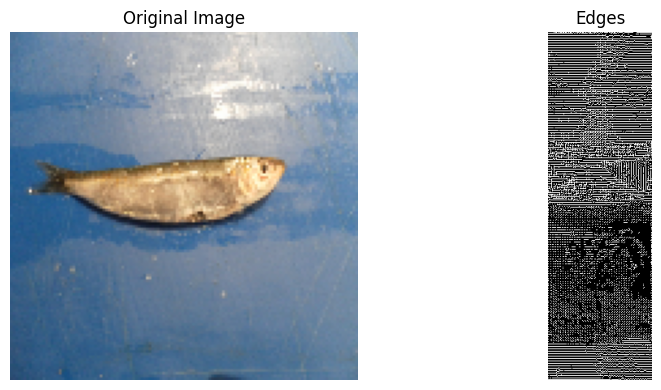

In [88]:
import cv2
import matplotlib.pyplot as plt

# Tính histogram màu sắc
histogram = cv2.calcHist(images, [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

# Trích xuất đặc trưng cạnh bằng Canny edge detection
# gray_image = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(images, 100, 200)

# Hiển thị hình ảnh và đặc trưng màu sắc, cạnh
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(images[0])
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edges')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# duỗi ảnh thành vector
# images = images.reshape(images.shape[0], -1)

In [ ]:
feature_vector = feature_vector.reshape(-1,1)
feature_vector.shape



from sklearn.cluster import MeanShift, estimate_bandwidth
# Xác định độ rộng băng thông (bandwidth) dựa trên dữ liệu
bandwidth = estimate_bandwidth(feature_vector, quantile=0.152)

# Tạo mô hình Mean Shift với độ rộng băng thông đã xác định
ms = MeanShift(bandwidth=bandwidth)

# Phân cụm dữ liệu
ms.fit(feature_vector)

# Lấy thông tin về các cụm được tìm thấy
labels = ms.labels_
centroids = ms.cluster_centers_
n_clusters = len(np.unique(labels))

# In ra số cụm tìm được
print("Số cụm tìm được:", n_clusters)

(768, 1)

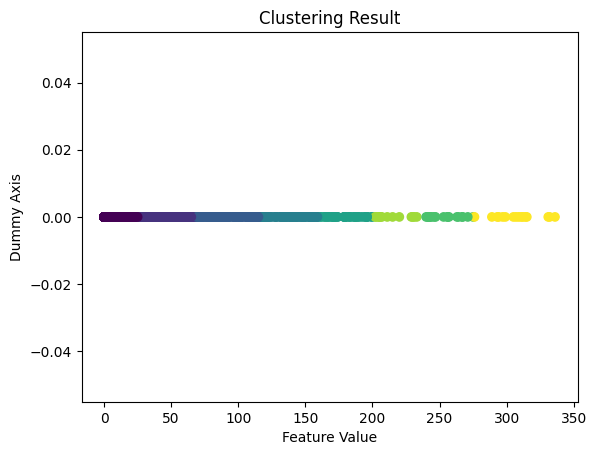

In [ ]:
import matplotlib.pyplot as plt

# Trực quan hóa kết quả phân cụm
plt.scatter(feature_vector, np.zeros_like(feature_vector), c=labels, cmap='viridis')
plt.title("Clustering Result")
plt.xlabel("Feature Value")
plt.ylabel("Dummy Axis")
plt.show()


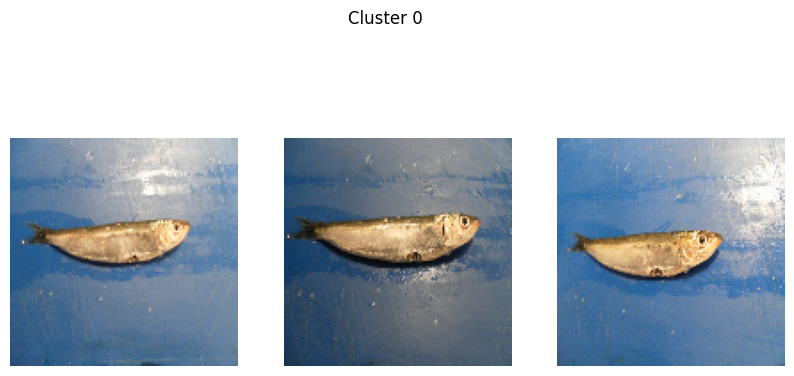

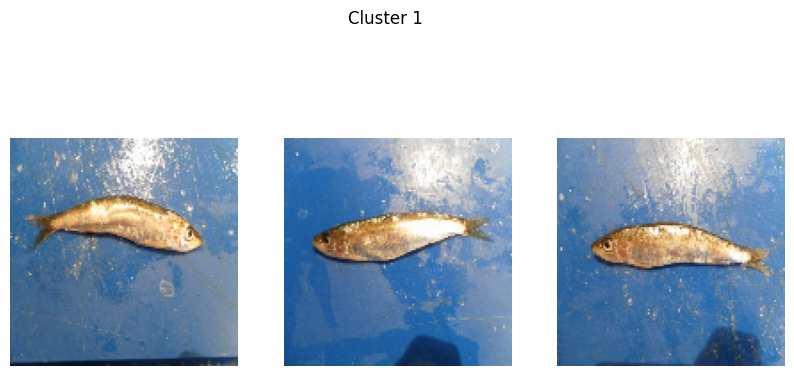

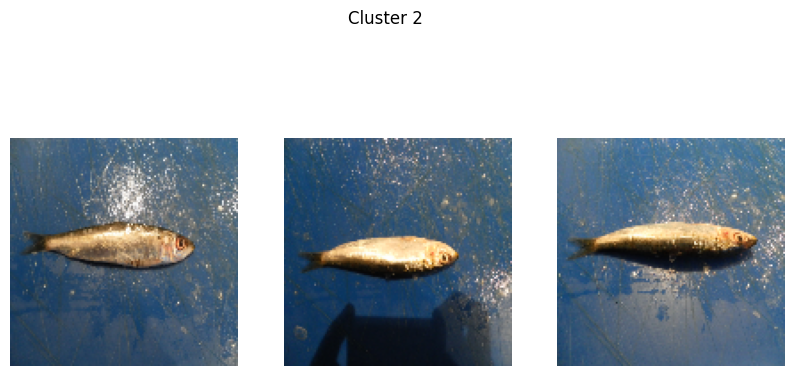

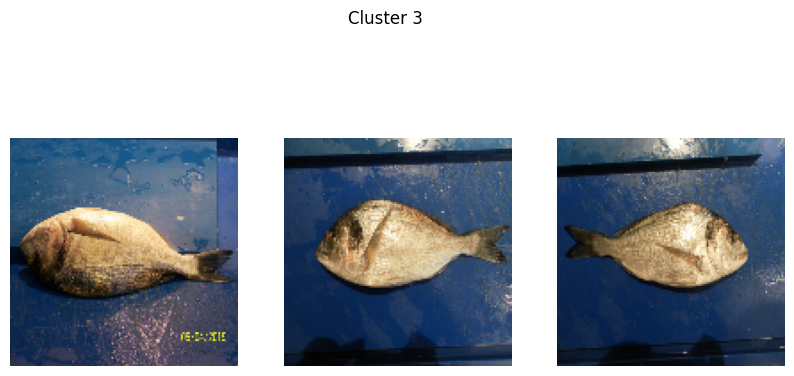

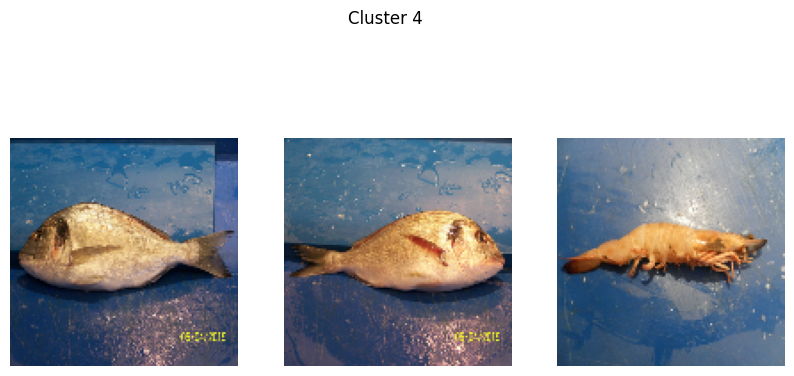

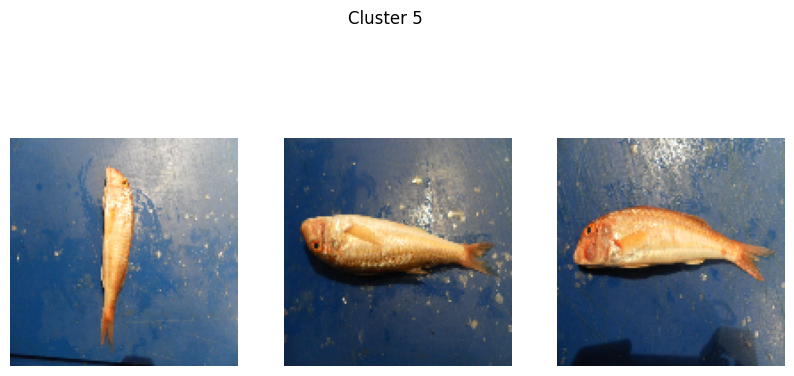

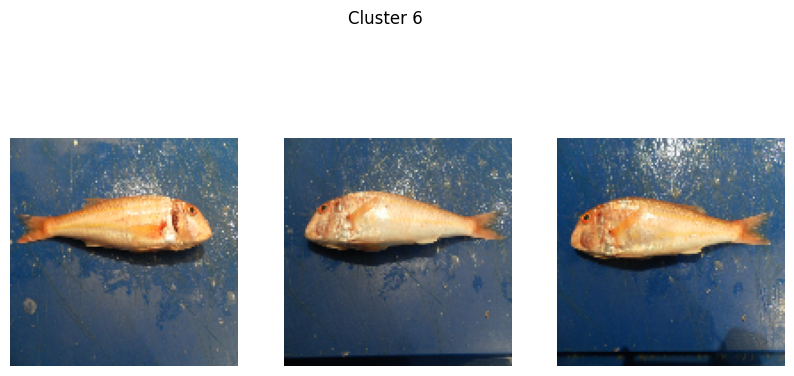

IndexError: index 655 is out of bounds for axis 0 with size 430

<Figure size 1000x500 with 0 Axes>

In [ ]:
num_images_per_cluster = 3
for cluster_id in range(n_clusters):
    cluster_indices = np.where(labels == cluster_id)[0]
    selected_indices = cluster_indices[:num_images_per_cluster]

    plt.figure(figsize=(10, 5))
    for i, idx in enumerate(selected_indices):
        image = images[idx]
        plt.subplot(1, num_images_per_cluster, i+1)
        plt.imshow(image)
        plt.axis('off')

    plt.suptitle(f"Cluster {cluster_id}")
    plt.show()

d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\package\anaconda3\envs\dyn\Lib\si

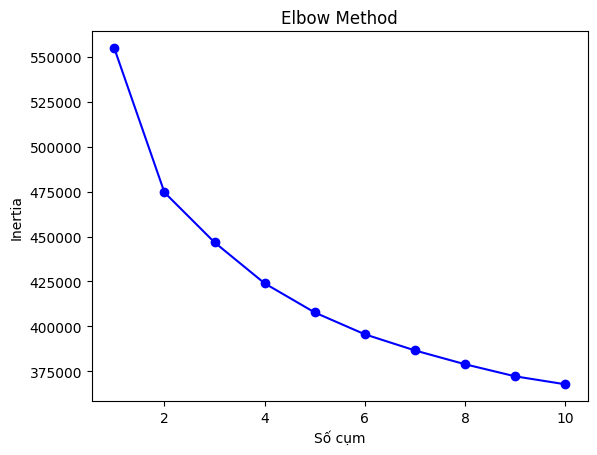

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Chạy thuật toán K-means với số cụm từ 1 đến 10
num_clusters = range(1, 11)
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(images)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(num_clusters, inertia, 'bo-')
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# # Vẽ biểu đồ Silhouette
# plt.plot(num_clusters[1:], silhouette_scores, 'bo-')
# plt.xlabel('Số cụm')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method')
# plt.show()
